# EDA, FE, FS

### Submitted By - Aniket Rathi
### Roll - 1805464

### House - Lex Luthor

# Importing Important Libraries

In [1]:
#All the important libraries are imported. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import datetime as dt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import warnings
from sklearn.linear_model import LinearRegression,Ridge


In [2]:
warnings.filterwarnings("ignore")

# Importing Dataset

In [3]:
#importing the assigned dataset and using head() to get an overview of the dataset
dataset = pd.read_csv('1805464.csv')
dataset.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200794332,COST co,2019-06-12 00:00:00,2019.0,1.929398e+09,2019-05-30,20190529,20190530,20190614.0,USD,RV,1.0,NaN,5496.68,20190530.0,NAAX,1.929398e+09,0
1,U001,0200780383,MEIJ,2019-04-09 00:00:00,2019.0,1.929009e+09,2019-03-22,20190322,20190322,20190406.0,USD,RV,1.0,NaN,100959.25,20190322.0,NAA8,1.929009e+09,0
2,U001,0200722444,PERFOR llc,2019-03-22 00:00:00,2019.0,1.928915e+09,2019-03-07,20190306,20190307,20190408.0,USD,RV,1.0,NaN,11152.70,20190307.0,NA32,1.928915e+09,0
3,U001,0200769623,WAL-MAR in,2020-02-21 00:00:00,2020.0,1.930475e+09,2020-02-04,20200204,20200204,20200219.0,USD,RV,1.0,NaN,30601.94,20200204.0,NAH4,1.930475e+09,0
4,U001,0200762950,HAR corporation,2019-10-21 00:00:00,2019.0,1.929976e+09,2019-10-08,20191006,20191008,20191023.0,USD,RV,1.0,NaN,126846.88,20191008.0,NAA8,1.929976e+09,0


In [4]:
# There's a spelling error in name of 1 column.
dataset.rename(columns={'buisness_year':'business_year'},inplace=True)

### Knowing my data

In [5]:
# Knowing the size of data and datatype of columns
print("Shape of data: ",dataset.shape,'\n\n')
print(dataset.dtypes)

Shape of data:  (50000, 19) 


business_code              object
cust_number                object
name_customer              object
clear_date                 object
business_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object


In [6]:
# As we can see my dataset has date-time column but their data-type is object
# Hence changing their types 

dataset['clear_date'] = pd.to_datetime(dataset['clear_date'])
dataset['business_year'] = pd.to_datetime(dataset['business_year'], format="%Y")
dataset['posting_date'] = pd.to_datetime(dataset['posting_date'])
dataset['document_create_date'] = pd.to_datetime(dataset['document_create_date'], format="%Y%m%d")
dataset['document_create_date.1'] = pd.to_datetime(dataset['document_create_date.1'], format="%Y%m%d")
dataset['due_in_date'] = pd.to_datetime(dataset['due_in_date'], format="%Y%m%d")
dataset['baseline_create_date'] = pd.to_datetime(dataset['baseline_create_date'], format="%Y%m%d")

# Identifying the missing values

In [7]:
# Seeing the amount of data null for every column in the dataset
dataset.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 4077
business_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

In [8]:
# Dropping the row where invoice_id is null 
# Dropping the "area_business" column since all values are null

dataset.drop(dataset.loc[dataset['invoice_id'].isnull()].index,inplace=True)
dataset.drop('area_business',axis=1,inplace=True)

# Finding duplicate columns & treating them

In [9]:
# Dropping the columns
dataset = dataset.T
dataset.drop_duplicates(keep='last',inplace=True)
dataset = dataset.T

In [10]:
print("Shape of data: ",dataset.shape,'\n\n')

Shape of data:  (49999, 16) 




# Finding constant columns

In [11]:
# Finding which columns are constant, here we can see how many unique values are there in each column
dataset.nunique()

business_code                 6
cust_number                1460
name_customer              4368
clear_date                  402
business_year                 2
document_create_date        507
document_create_date.1      506
due_in_date                 545
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         45197
baseline_create_date        508
cust_payment_terms           76
invoice_id                49999
isOpen                        2
dtype: int64

In [12]:
# Dropping document_type and posting_id since there's only 1 unique value which means they are constant columns
dataset.drop(['document type','posting_id'],axis=1,inplace=True)

In [13]:
# Verifying shape of dataset and if there remain any duplicacies or not
print("Shape of data: ",dataset.shape,'\n\n')
print(dataset.duplicated().sum())

Shape of data:  (49999, 14) 


0


# 1st Split :- Based on clear_date == null

In [14]:
# Null_Data created to store where clear_date isnull
null_test = dataset[dataset.clear_date.isnull()].reset_index()

# Dropping index column since it is an extra column added
null_test.drop(['index'],axis=1,inplace=True)

# printing shape of Null_Data to verify
print("Shape of data where clear_date is null: ", null_test.shape)

Shape of data where clear_date is null:  (4077, 14)


In [15]:
# Separating data where clear_date is not null
big_data = dataset[dataset.clear_date.notnull()].reset_index()

# Dropping index column since it is an extra column added
big_data.drop(['index'],axis=1,inplace=True)

print("Shape of big data: ", big_data.shape) 

Shape of big data:  (45922, 14)


## Sorting the big_data on basis of document_create_date.1

In [16]:
big_data.sort_values(by='document_create_date.1',inplace=True)
big_data

,business_code,cust_number,name_customer,clear_date,business_year,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
6229,U001,0200769623,WAL-MAR llc,2019-01-09,2019-01-01,2018-12-29,2018-12-30,2019-01-14,USD,5766.73,2018-12-30,NAH4,1.92854e+09,0
21600,U001,0200769623,WAL-MAR associates,2019-01-09,2019-01-01,2018-12-30,2018-12-30,2019-01-14,USD,19785.9,2018-12-30,NAH4,1.92854e+09,0
8246,U001,0200769623,WAL-MAR in,2019-01-09,2019-01-01,2018-12-30,2018-12-30,2019-01-14,USD,33637.8,2018-12-30,NAH4,1.92854e+09,0
8268,U001,0200769623,WAL-MAR llc,2019-01-11,2019-01-01,2018-12-30,2018-12-30,2019-01-14,USD,2999.92,2018-12-30,NAH4,1.92854e+09,0
41060,U001,0200769623,WAL-MAR co,2019-01-09,2019-01-01,2018-12-29,2018-12-30,2019-01-14,USD,50701.6,2018-12-30,NAH4,1.92854e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10615,U001,0200418007,AM foundation,2020-03-13,2020-01-01,2020-02-20,2020-02-27,2020-03-13,USD,1699.6,2020-02-27,NAA8,1.93055e+09,0
6331,U001,CCU013,KRAFT F foundation,2020-03-27,2020-01-01,2020-02-27,2020-02-27,2020-02-27,USD,15517.8,2020-02-27,NAX2,1.93058e+09,0
36772,U001,0200759878,SA corporation,2020-03-19,2020-01-01,2020-02-26,2020-02-27,2020-03-13,USD,14329.4,2020-02-27,NAH4,1.93057e+09,0
11868,CA02,0140105847,GORDON F,2020-03-13,2020-01-01,2020-02-27,2020-02-27,2020-03-16,CAD,964.74,2020-03-06,CA10,2.96062e+09,0


In [17]:
# Finding the unique values in big_data
big_data.nunique()

business_code                 6
cust_number                1431
name_customer              4256
clear_date                  402
business_year                 2
document_create_date        429
document_create_date.1      425
due_in_date                 494
invoice_currency              2
total_open_amount         41555
baseline_create_date        433
cust_payment_terms           74
invoice_id                45922
isOpen                        1
dtype: int64

In [18]:
#dropping isOpen since constant
big_data.drop(['isOpen'],axis=1,inplace=True)

# Performing train, test & validation split on big_data

In [19]:
# Finding 15% of the shape for spliting
0.15*45922

6888.3

### Split Details - train=70%, test=15%, validation=15% 

In [20]:
# creating test set1
validation_set2 = big_data.iloc[-6880:,:]
validation_set2.reset_index(inplace=True)
validation_set2.drop('index',axis=1,inplace=True)
print("Shape of validation_set2: ",validation_set2.shape)

Shape of validation_set2:  (6880, 13)


In [21]:
#creating validation set1
validation_set1 = big_data.iloc[-13760:-6880,:]
validation_set1.reset_index(inplace=True)
validation_set1.drop('index',axis=1,inplace=True)
print("Shape of validation_set1: ",validation_set1.shape)

Shape of validation_set1:  (6880, 13)


In [22]:
#creating train set
train_set = big_data.iloc[:-13760:,:]
train_set.reset_index(inplace=True)
train_set.drop('index',axis=1,inplace=True)
print("Shape of train_set: ",train_set.shape)

Shape of train_set:  (32162, 13)


# Creating delay column

#### Creating delay column by performing clear_date-due_in_date

In [23]:
train_set['delay'] = train_set.apply(lambda row: (row['clear_date'] - row['due_in_date']), axis=1)
validation_set1['delay'] = validation_set1.apply(lambda row: (row['clear_date'] - row['due_in_date']), axis=1)
validation_set2['delay'] = validation_set2.apply(lambda row: (row['clear_date'] - row['due_in_date']), axis=1)

In [24]:
#converting to float since it's datatype is timedelta 
train_set['delay'] = train_set['delay'].dt.days.astype('float32')
validation_set1['delay'] = validation_set1['delay'].dt.days.astype('float32')
validation_set2['delay'] = validation_set2['delay'].dt.days.astype('float32')

# Label Encoding

#### We will also handle the rare labels here 

In [25]:
#grouping cust_number to find out invoice_id count for each customer number
df1 = train_set.groupby('cust_number').agg({'invoice_id':'count'}).reset_index()

#Now we can create a list for customers whose count of invoices are more than 5 
cust_list = df1[df1.invoice_id>5].cust_number.unique() 

#Where if the cust_number belong to above list, we assign the respective cust_number. Else we assign it to others category
train_set['cust_list'] = np.where(train_set.cust_number.isin(cust_list),train_set.cust_number,'others')
validation_set1['cust_list'] = np.where(validation_set1.cust_number.isin(cust_list),validation_set1.cust_number,'others')
validation_set2['cust_list'] = np.where(validation_set2.cust_number.isin(cust_list),validation_set2.cust_number,'others')

#Now after handling rare labels, we can encode the cust_number easily 
le_cust_num = LabelEncoder()
train_set['cust_list'].astype(str)
train_set['cust_list_encoded'] = le_cust_num.fit_transform(train_set['cust_list'])
validation_set1['cust_list'].astype(str)
validation_set1['cust_list_encoded'] = le_cust_num.transform(validation_set1['cust_list']) 
validation_set2['cust_list'].astype(str)
validation_set2['cust_list_encoded'] = le_cust_num.transform(validation_set2['cust_list'])

In [26]:
le_business_code = LabelEncoder()
train_set['business_code'].astype(str)
train_set['business_code_encoded'] = le_business_code.fit_transform(train_set['business_code'])
validation_set1['business_code'].astype(str)
validation_set1['business_code_encoded'] = le_business_code.transform(validation_set1['business_code']) 
validation_set2['business_code'].astype(str)
validation_set2['business_code_encoded'] = le_business_code.transform(validation_set2['business_code'])

In [27]:
label_invoice_currency = LabelEncoder()
train_set['invoice_currency'].astype(str)
train_set['invoice_currency_encoded'] = label_invoice_currency.fit_transform(train_set['invoice_currency'])
validation_set1['invoice_currency'].astype(str)
validation_set1['invoice_currency_encoded'] = label_invoice_currency.transform(validation_set1['invoice_currency']) 
validation_set2['invoice_currency'].astype(str)
validation_set2['invoice_currency_encoded'] = label_invoice_currency.transform(validation_set2['invoice_currency'])

In [28]:
#grouping cust_number to find out invoice_id count for each cust_payment_terms
df2 = train_set.groupby('cust_payment_terms').agg({'invoice_id':'count'}).reset_index()

#Now we can create a list for customer payment terms whose count of invoices are more than 3 
cust_payment_list = df2[df2.invoice_id>3].cust_payment_terms.unique() 

#Where if the cust_payment_term belongs to above list, we assign the respective payment_term. Else we assign it to others category
train_set['cust_payment_list'] = np.where(train_set.cust_payment_terms.isin(cust_payment_list),train_set.cust_payment_terms,'others')
validation_set1['cust_payment_list'] = np.where(validation_set1.cust_payment_terms.isin(cust_payment_list),validation_set1.cust_payment_terms,'others')
validation_set2['cust_payment_list'] = np.where(validation_set2.cust_payment_terms.isin(cust_payment_list),validation_set2.cust_payment_terms,'others')

#Now after handling rare labels, we can encode the cust_payment_terms easily 
le_cust_pay_terms = LabelEncoder()
train_set['cust_payment_list'].astype(str)
train_set['cust_payment_list_encoded'] = le_cust_pay_terms.fit_transform(train_set['cust_payment_list'])
validation_set1['cust_payment_list'].astype(str)
validation_set1['cust_payment_list_encoded'] = le_cust_pay_terms.transform(validation_set1['cust_payment_list']) 
validation_set2['cust_payment_list'].astype(str)
validation_set2['cust_payment_list_encoded'] = le_cust_pay_terms.transform(validation_set2['cust_payment_list'])

# Let's explore my data

In [29]:
#Finding the datatype of columns in train_set
train_set.dtypes

business_code                        object
cust_number                          object
name_customer                        object
clear_date                   datetime64[ns]
business_year                datetime64[ns]
document_create_date         datetime64[ns]
document_create_date.1       datetime64[ns]
due_in_date                  datetime64[ns]
invoice_currency                     object
total_open_amount                    object
baseline_create_date         datetime64[ns]
cust_payment_terms                   object
invoice_id                           object
delay                               float32
cust_list                            object
cust_list_encoded                     int32
business_code_encoded                 int32
invoice_currency_encoded              int32
cust_payment_list                    object
cust_payment_list_encoded             int32
dtype: object

In [30]:
#converting total_open_amount to float type
train_set['total_open_amount'] = train_set['total_open_amount'].astype('float32')
validation_set1['total_open_amount'] = validation_set1['total_open_amount'].astype('float32')
validation_set2['total_open_amount'] = validation_set2['total_open_amount'].astype('float32')

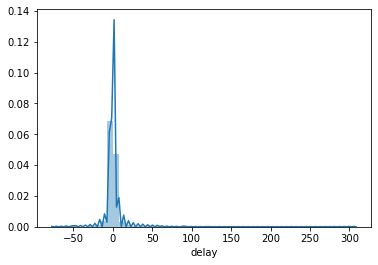

In [31]:
sns.distplot(train_set.delay)

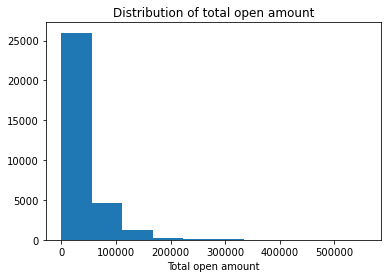

In [32]:
plt.hist(train_set['total_open_amount'])
plt.xlabel("Total open amount")
plt.title("Distribution of total open amount")
plt.show()

#### we can clearly see that the total_open_amount is higly right skewed

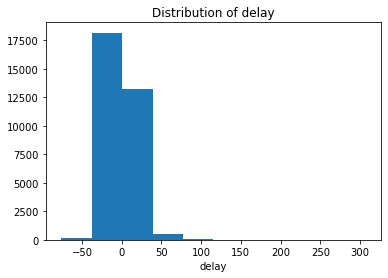

In [33]:
plt.hist(train_set['delay'])
plt.xlabel("delay")
plt.title("Distribution of delay")
plt.show()

#### clearly the delay is also higly right skewed

### Boxplot for total_open_amount

Q1:  4378.509765625
Q3:  45659.00390625
IQR:  41280.494140625 



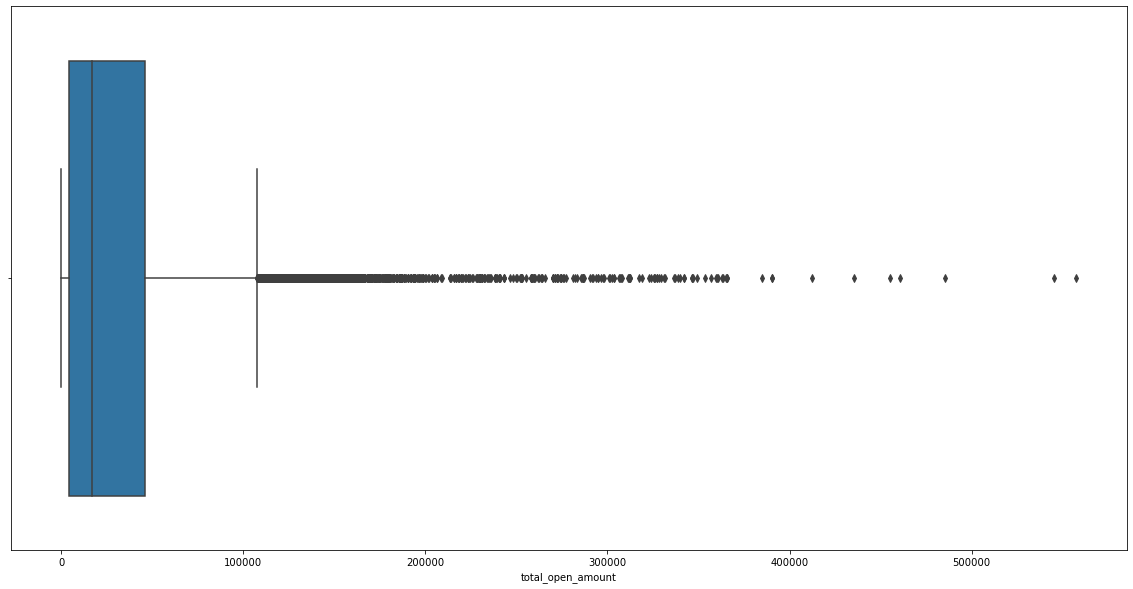

In [34]:
Q1 = train_set['total_open_amount'].quantile(0.25)
Q3 = train_set['total_open_amount'].quantile(0.75)
IQR = Q3-Q1
print("Q1: ",Q1)
print("Q3: ",Q3)
print("IQR: ",IQR,"\n")

plt.figure(figsize=(20,10))
sns.boxplot(x = train_set['total_open_amount'])

### Normalising total_open_amount

In [35]:
#Standardizing the open amount
sc_amount=StandardScaler()
train_set['total_open_amount_standardized'] = sc_amount.fit_transform(train_set[['total_open_amount']])
validation_set1['total_open_amount_standardized'] = sc_amount.transform(validation_set1[['total_open_amount']])
validation_set2['total_open_amount_standardized'] = sc_amount.transform(validation_set2[['total_open_amount']])

In [36]:
#Normalizing the total amount
mm_scaler_amount = MinMaxScaler() 
train_set['total_open_amount_normalize']=mm_scaler_amount.fit_transform(train_set[['total_open_amount']])
validation_set1['total_open_amount_normalize']=mm_scaler_amount.transform(validation_set1[['total_open_amount']])
validation_set2['total_open_amount_normalize']=mm_scaler_amount.transform(validation_set2[['total_open_amount']])

In [37]:
#Applying box-cox on total open amount
boxcox_scaler_amount = PowerTransformer(method='box-cox', standardize=True)
train_set['total_open_amount_power']=boxcox_scaler_amount.fit_transform(train_set[['total_open_amount']])
validation_set1['total_open_amount_power']=boxcox_scaler_amount.transform(validation_set1[['total_open_amount']])
validation_set2['total_open_amount_power']=boxcox_scaler_amount.transform(validation_set2[['total_open_amount']])

### Extracting time related features

In [38]:
# month extraction 
train_set['due_in_month'] = train_set['due_in_date'].dt.month
train_set['document_create_month'] = train_set['document_create_date.1'].dt.month

validation_set1['due_in_month'] = validation_set1['due_in_date'].dt.month
validation_set1['document_create_month'] = validation_set1['document_create_date.1'].dt.month

validation_set2['due_in_month'] = validation_set2['due_in_date'].dt.month
validation_set2['document_create_month'] = validation_set2['document_create_date.1'].dt.month

In [39]:
# day extraction

train_set['due_in_day'] = train_set['due_in_date'].dt.day
train_set['document_create_day'] = train_set['document_create_date.1'].dt.day

validation_set1['due_in_day'] = validation_set1['due_in_date'].dt.day
validation_set1['document_create_day'] = validation_set1['document_create_date.1'].dt.day

validation_set2['due_in_day'] = validation_set2['due_in_date'].dt.day
validation_set2['document_create_day'] = validation_set2['document_create_date.1'].dt.day

In [40]:
# week day extraction

train_set['due_in_weekday'] = train_set['due_in_date'].dt.weekday
train_set['document_create_weekday'] = train_set['document_create_date.1'].dt.weekday

validation_set1['due_in_weekday'] = validation_set1['due_in_date'].dt.weekday
validation_set1['document_create_weekday'] = validation_set1['document_create_date.1'].dt.weekday

validation_set2['due_in_weekday'] = validation_set2['due_in_date'].dt.weekday
validation_set2['document_create_weekday'] = validation_set2['document_create_date.1'].dt.weekday

In [41]:
# quarter extraction

train_set['due_in_quarter'] = train_set['due_in_date'].dt.quarter
train_set['document_create_quarter'] = train_set['document_create_date.1'].dt.quarter

validation_set1['due_in_quarter'] = validation_set1['due_in_date'].dt.quarter
validation_set1['document_create_quarter'] = validation_set1['document_create_date.1'].dt.quarter

validation_set2['due_in_quarter'] = validation_set2['due_in_date'].dt.quarter
validation_set2['document_create_quarter'] = validation_set2['document_create_date.1'].dt.quarter

(array([2.5983e+04, 4.6080e+03, 1.2420e+03, 1.7100e+02, 8.3000e+01,
        4.5000e+01, 2.1000e+01, 4.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

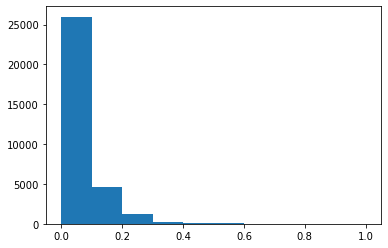

In [42]:
plt.hist(train_set['total_open_amount_normalize'])

(array([2.5983e+04, 4.6080e+03, 1.2420e+03, 1.7100e+02, 8.3000e+01,
        4.5000e+01, 2.1000e+01, 4.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([-0.79487485,  0.6033235 ,  2.0015218 ,  3.3997202 ,  4.797919  ,
         6.196117  ,  7.5943155 ,  8.992514  , 10.390712  , 11.788911  ,
        13.187109  ], dtype=float32),
 <a list of 10 Patch objects>)

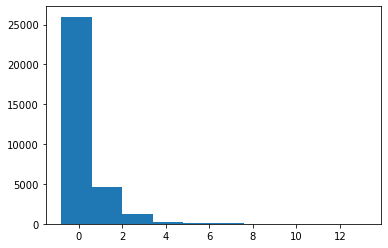

In [43]:
plt.hist(train_set['total_open_amount_standardized'])

(array([ 522., 3169., 4142., 5305., 7854., 6371., 3655.,  974.,  151.,
          19.]),
 array([-2.5899522 , -1.9799209 , -1.3698895 , -0.7598581 , -0.14982668,
         0.46020472,  1.0702361 ,  1.6802675 ,  2.290299  ,  2.9003303 ,
         3.5103617 ], dtype=float32),
 <a list of 10 Patch objects>)

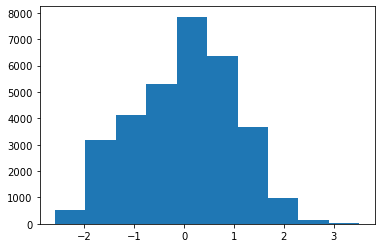

In [44]:
plt.hist(train_set['total_open_amount_power'])

### Box-cox gave the best distribution for total_open_amount

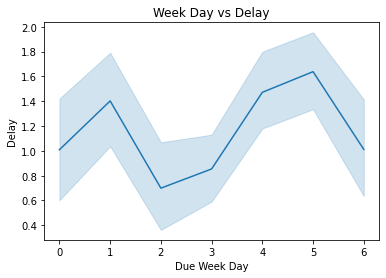

In [45]:
sns.lineplot(train_set['due_in_weekday'], train_set['delay'])
plt.xlabel("Due Week Day")
plt.ylabel("Delay")
plt.title("Week Day vs Delay")
plt.show()

#### We can see a dip in delay when weekday=2 and max when weekday=5 

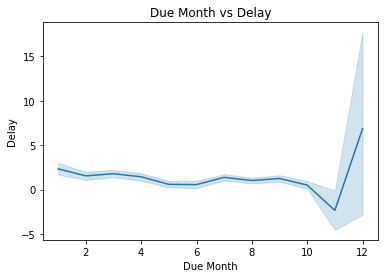

In [46]:
sns.lineplot(train_set['due_in_month'], train_set['delay'])
plt.xlabel("Due Month")
plt.ylabel("Delay")
plt.title("Due Month vs Delay")
plt.show()

#### There's a rise in delay for month 12 due to presence of festivals and holidays in december

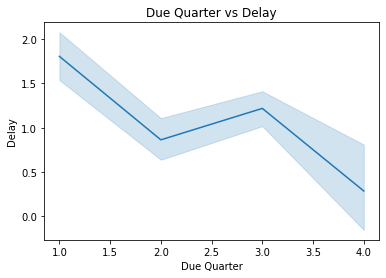

In [47]:
sns.lineplot(train_set['due_in_quarter'], train_set['delay'])
plt.xlabel("Due Quarter")
plt.ylabel("Delay")
plt.title("Due Quarter vs Delay")
plt.show()

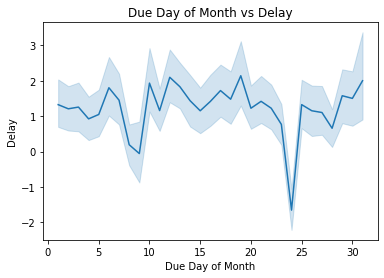

In [48]:
sns.lineplot(train_set['due_in_day'], train_set['delay'])
plt.xlabel("Due Day of Month")
plt.ylabel("Delay")
plt.title("Due Day of Month vs Delay")
plt.show()

#### The delay is lowest for 24th day of month

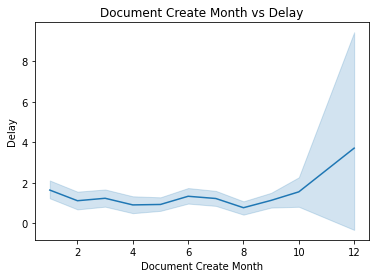

In [49]:
sns.lineplot(train_set['document_create_month'], train_set['delay'])
plt.xlabel("Document Create Month")
plt.ylabel("Delay")
plt.title("Document Create Month vs Delay")
plt.show()

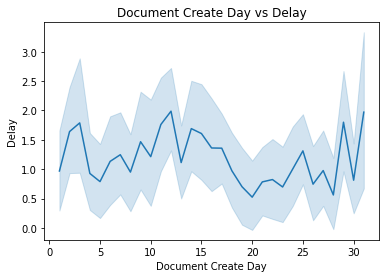

In [50]:
sns.lineplot(train_set['document_create_day'], train_set['delay'])
plt.xlabel("Document Create Day")
plt.ylabel("Delay")
plt.title("Document Create Day vs Delay")
plt.show()

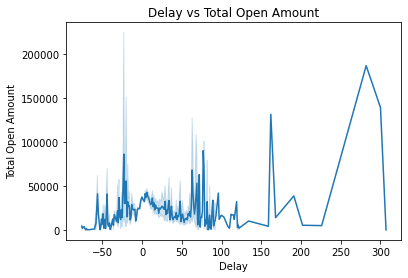

In [51]:
sns.lineplot(train_set['delay'],train_set['total_open_amount'])
plt.xlabel("Delay")
plt.ylabel("Total Open Amount")
plt.title("Delay vs Total Open Amount")
plt.show()

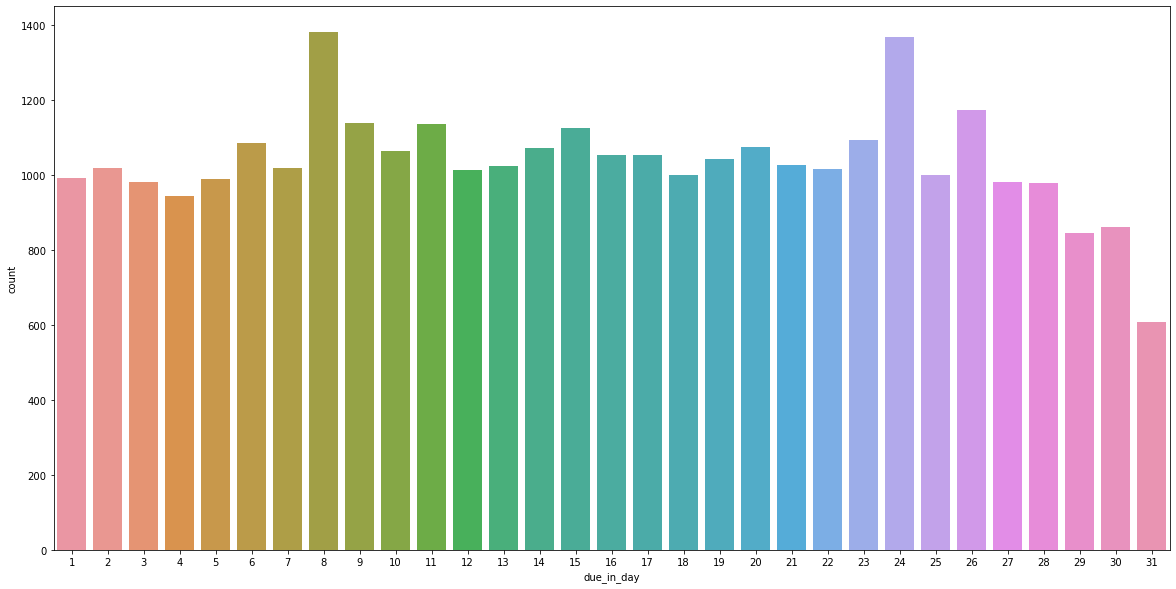

In [52]:
plt.figure(figsize=(20,10))
sns.countplot(data=train_set,x=train_set['due_in_day'])

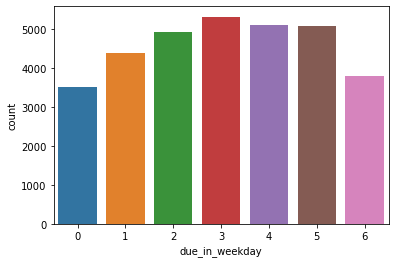

In [53]:
sns.countplot(data=train_set,x=train_set['due_in_weekday'])

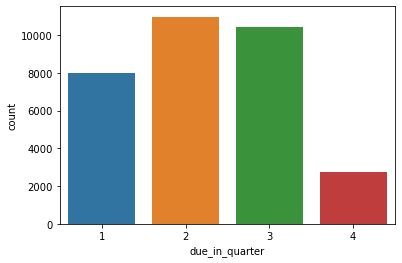

In [54]:
sns.countplot(data=train_set,x=train_set['due_in_quarter'])

#### Inference - max dues in 2nd and least dues in 4th quarter

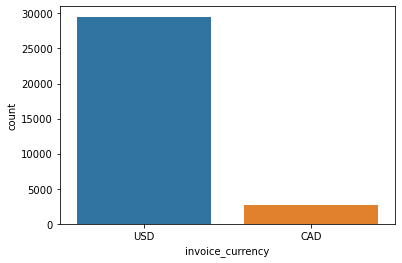

In [55]:
sns.countplot(train_set['invoice_currency'])

#### Inference - Amount of orders in USD are more than CAD

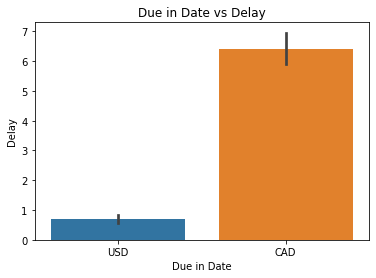

In [56]:
sns.barplot(x=train_set['invoice_currency'], y=train_set['delay'])
plt.xlabel("Due in Date")
plt.ylabel("Delay")
plt.title("Due in Date vs Delay")
plt.show()

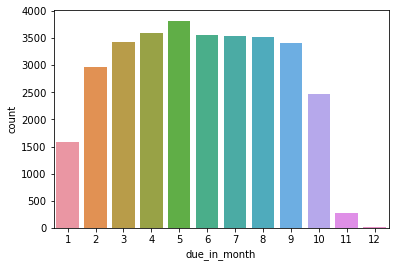

In [57]:
sns.countplot(data=train_set,x=train_set['due_in_month'])

#### Inference - Compared to other months, November and December have very less dues pending

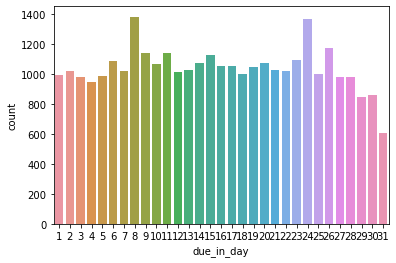

In [58]:
sns.countplot(data=train_set,x=train_set['due_in_day'])

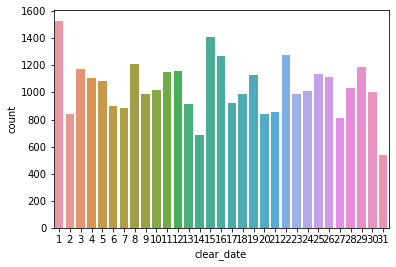

In [59]:
sns.countplot(data=train_set,x=train_set['clear_date'].dt.day)

In [60]:
print("mean delay: ",train_set['delay'].mean())

mean delay:  1.1628319025039673


### The similar pattern of due_in_date and date of clear_date signifies why the mean delay is 1.16

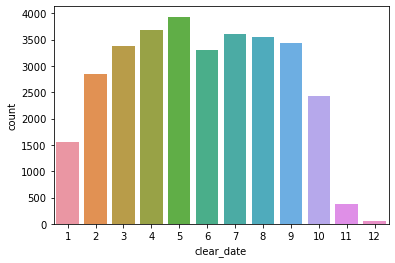

In [61]:
sns.countplot(data=train_set,x=train_set['clear_date'].dt.month)

# Feature Engineering

### The following features are created after seeing an un-usual pattern for these particular conditions in EDA

In [62]:
train_set['DueDay_is_24']=np.where(train_set['due_in_date'].dt.day==24,1,0)
validation_set1['DueDay_is_24']=np.where(validation_set1['due_in_date'].dt.day==24,1,0)
validation_set2['DueDay_is_24']=np.where(validation_set2['due_in_date'].dt.day==24,1,0)

In [63]:
train_set['DueWeekDay_is_5']=np.where(train_set['due_in_date'].dt.weekday==5,1,0)
validation_set1['DueWeekDay_is_5']=np.where(validation_set1['due_in_date'].dt.weekday==5,1,0)
validation_set2['DueWeekDay_is_5']=np.where(validation_set2['due_in_date'].dt.weekday==5,1,0)

In [64]:
train_set['DueQuarter_is_1']=np.where(train_set['due_in_date'].dt.quarter==1,1,0)
validation_set1['DueQuarter_is_1']=np.where(validation_set1['due_in_date'].dt.quarter==1,1,0)
validation_set2['DueQuarter_is_1']=np.where(validation_set2['due_in_date'].dt.quarter==1,1,0)

# Heatmap For Numerical Columns

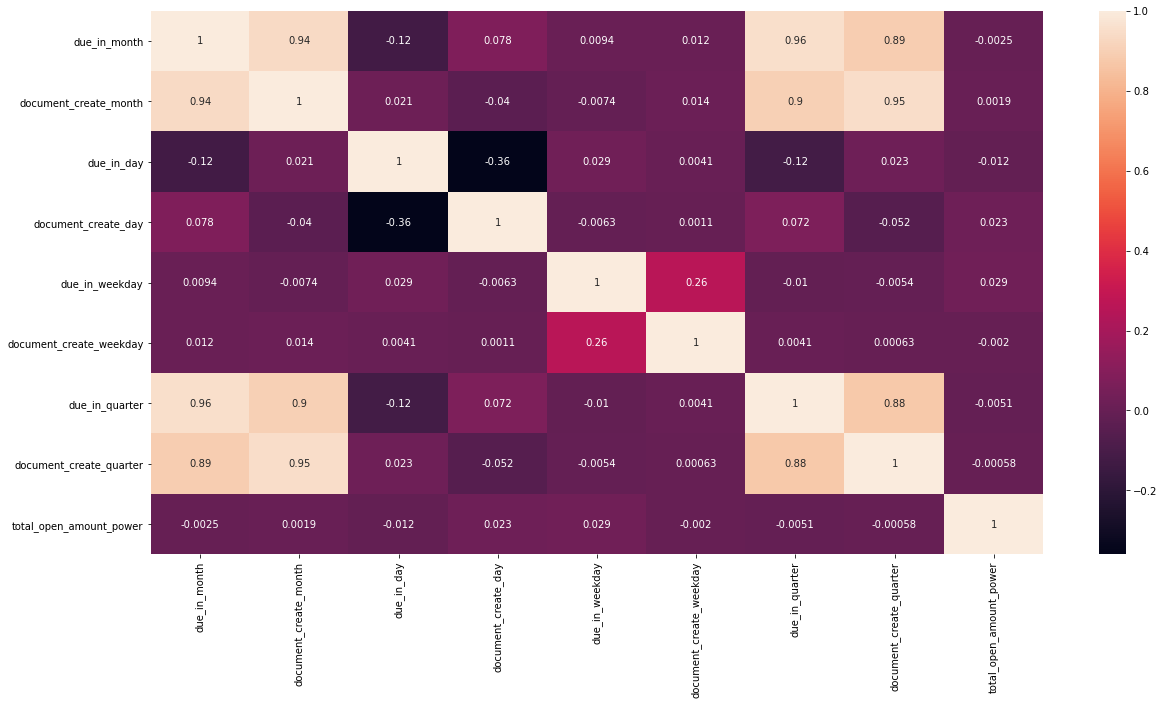

In [65]:
#this heatmap is used to show correlation between the numerical columns
numerical_data = train_set[['due_in_month',
                   'document_create_month','due_in_day','document_create_day','due_in_weekday','document_create_weekday',
                   'due_in_quarter','document_create_quarter','total_open_amount_power']]

plt.figure(figsize=(20,10))
corel=numerical_data.corr()
sns.heatmap(corel,xticklabels=corel.columns,yticklabels=corel.columns,annot=True)

## x_train, x_test, y_train, y_test, x_valid, y_valid

In [66]:
train_set.dtypes

business_code                             object
cust_number                               object
name_customer                             object
clear_date                        datetime64[ns]
business_year                     datetime64[ns]
document_create_date              datetime64[ns]
document_create_date.1            datetime64[ns]
due_in_date                       datetime64[ns]
invoice_currency                          object
total_open_amount                        float32
baseline_create_date              datetime64[ns]
cust_payment_terms                        object
invoice_id                                object
delay                                    float32
cust_list                                 object
cust_list_encoded                          int32
business_code_encoded                      int32
invoice_currency_encoded                   int32
cust_payment_list                         object
cust_payment_list_encoded                  int32
total_open_amount_st

#### Selecting all the encoded forms of all the categorical columns.
#### Selecting all the new features produced during and after EDA

In [67]:
x_train = train_set[['cust_list_encoded','business_code_encoded','invoice_currency_encoded','due_in_month','cust_payment_list_encoded',
                   'document_create_month','due_in_day','document_create_day','due_in_weekday','document_create_weekday',
                   'due_in_quarter','document_create_quarter','total_open_amount_power','DueDay_is_24','DueWeekDay_is_5','DueQuarter_is_1']]
y_train = train_set[['delay']]

In [68]:
x_test = validation_set1[['cust_list_encoded','business_code_encoded','invoice_currency_encoded','due_in_month','cust_payment_list_encoded',
                   'document_create_month','due_in_day','document_create_day','due_in_weekday','document_create_weekday',
                   'due_in_quarter','document_create_quarter','total_open_amount_power','DueDay_is_24','DueWeekDay_is_5','DueQuarter_is_1']]
y_test = validation_set1[['delay']]

In [69]:
x_valid = validation_set2[['cust_list_encoded','business_code_encoded','invoice_currency_encoded','due_in_month','cust_payment_list_encoded',
                   'document_create_month','due_in_day','document_create_day','due_in_weekday','document_create_weekday',
                   'due_in_quarter','document_create_quarter','total_open_amount_power','DueDay_is_24','DueWeekDay_is_5','DueQuarter_is_1']]
y_valid = validation_set2[['delay']]

In [70]:
#confirming the shape of test and valid data 
print(x_test.shape)
print(x_valid.shape)

(6880, 16)
(6880, 16)


# Feature Selection

<!-- from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)


sfs.fit(x_train, y_train)
sfs.k_feature_names_ -->

In [71]:
# sbs = SFS(RandomForestRegressor(), 
#            k_features=9, 
#            forward=False, 
#            floating=False,
#            scoring='r2',
#            cv=2)

# # fit the object to our training data.
# sbs = sbs.fit(x_train, y_train)

# # print the selected features. 
# selected_features = x_train.columns[list(sbs.k_feature_idx_)]
# print(selected_features)

# # print the final prediction score.
# print(sbs.k_score_)

[0.20502993 0.0052752  0.00450268 0.03499461 0.10271922 0.03500942
 0.0598748  0.06220312 0.04942784 0.0470067  0.01431281 0.01476681
 0.33279553 0.00628745 0.02101958 0.00477432]


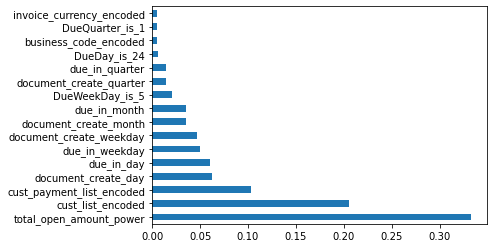

In [72]:
#This is a ensemble based learning technique used for feature selection. 

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

# Model Training 

In [73]:
# creating a separte set of features that are suggested by the extra-tree-classifier

x_train2 = train_set[['cust_list_encoded','cust_payment_list_encoded', 'due_in_day',
       'document_create_day', 'due_in_weekday', 'document_create_weekday',
       'total_open_amount_power']]
y_train2 = train_set[['delay']]

x_test2 = validation_set1[['cust_list_encoded', 'cust_payment_list_encoded','due_in_day',
       'document_create_day', 'due_in_weekday', 'document_create_weekday',
                           
       'total_open_amount_power']]
y_test2 = validation_set1[['delay']]

x_valid2 = validation_set2[['cust_list_encoded','cust_payment_list_encoded', 'due_in_day',
                           
       'document_create_day', 'due_in_weekday', 'document_create_weekday',
       'total_open_amount_power']]
y_valid2 = validation_set2[['delay']]

## Validation set results

In [74]:
MSE_Score_valid = []
RMSE_valid = []
Algorithm_valid = []

#### Applying ADA Boost on validation set

In [75]:
Algorithm_valid.append('ADA BOOST')
ada_valid = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), loss='square', random_state=1, n_estimators=100)
ada_valid.fit(x_train2, y_train2)
ada_valid.score(x_valid2, y_valid2)
predicted_ada_valid = ada_valid.predict(x_valid2)
MSE_Score_valid.append(mean_squared_error(y_valid2, predicted_ada_valid))
RMSE_valid.append(mean_squared_error(y_valid2, predicted_ada_valid,squared=False))

#### Applying Linear Regression on validation set

In [76]:
Algorithm_valid.append('Linear Regression')
clf_lr_valid = LinearRegression()
clf_lr_valid.fit(x_train2, y_train2)

predicted_lr_valid = clf_lr_valid.predict(x_valid2)
MSE_Score_valid.append(mean_squared_error(y_valid2, predicted_lr_valid))
RMSE_valid.append(mean_squared_error(y_valid2, predicted_lr_valid,squared=False))

#### Applying Random Forest on validation set

In [77]:
Algorithm_valid.append('Random Forest')
clf_rf_valid = RandomForestRegressor()
clf_rf_valid.fit(x_train2, y_train2)

predicted_rf_valid = clf_rf_valid.predict(x_valid2)

MSE_Score_valid.append(mean_squared_error(y_valid2, predicted_rf_valid))
RMSE_valid.append(mean_squared_error(y_valid2, predicted_rf_valid,squared=False))

#### Applying XGB Regressor on validation set

In [78]:
Algorithm_valid.append('XGB')
clf_xgb_valid = xgb.XGBRegressor()
clf_xgb_valid.fit(x_train2, y_train2)

predicted_xgb_valid = clf_xgb_valid.predict(x_valid2)
MSE_Score_valid.append(mean_squared_error(y_valid2, predicted_xgb_valid))
RMSE_valid.append(mean_squared_error(y_valid2, predicted_xgb_valid,squared=False))

#### Applying SVR on validation set

In [79]:
Algorithm_valid.append('SVR')
clf_svr_valid = SVR()
clf_svr_valid.fit(x_train2, y_train2)

predicted_svr_valid = clf_svr_valid.predict(x_valid2)


MSE_Score_valid.append(mean_squared_error(y_valid2, predicted_svr_valid))
RMSE_valid.append(mean_squared_error(y_valid2, predicted_svr_valid,squared=False))

#### Scorecard for all the above algorithms implemented on validation set

In [80]:
Comparison_valid2 = pd.DataFrame(list(zip(Algorithm_valid, MSE_Score_valid, RMSE_valid)), columns = ['Algorithm_valid', 'MSE_Score_valid', 'RMSE_Score_valid'])
Comparison_valid2

,Algorithm_valid,MSE_Score_valid,RMSE_Score_valid
0,ADA BOOST,56.399447,7.509956
1,Linear Regression,96.181495,9.807216
2,Random Forest,56.414446,7.510955
3,XGB,51.193150,7.154939
4,SVR,87.318294,9.344426


## Hyperparameter tuning using GridSearchCV

#### Hyperparameter tuning for Random Forest

In [81]:
param_grid = {'bootstrap':[True], 'max_depth':[5,10,20,None],'max_features':['auto','log2'],'n_estimators':[5,6,7,8,9,10,15,20]}
rf_tuned = RandomForestRegressor(random_state=1)
grid = GridSearchCV(estimator=rf_tuned,param_grid=param_grid,cv=3,n_jobs=1,verbose=0,return_train_score=True)
grid.fit(x_train2,y_train2)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 20, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 15, 20]},
             return_train_score=True)

In [82]:
#Getting the best parameters for random forest regressor
grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 20}

#### Hyperparameter tuning for ADA

In [83]:
param_ada = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

grid_ada = GridSearchCV(AdaBoostRegressor(),
 param_grid= param_ada,
 cv=3,
 n_jobs=-1)

grid_ada.fit(x_train2, y_train2)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]})

In [84]:
# best parameters for AdaBoost algorithm
grid_ada.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}

## Test Set Results

In [85]:
MSE_Score = []
RMSE_Score = []
Algorithm = []

#### Applying ADA Boost on test set

In [86]:
Algorithm.append('ADA BOOST')
ada_test = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), loss='square', random_state=1, n_estimators=100)
ada_test.fit(x_train2, y_train2)
ada_test.score(x_train2, y_train2)
predicted_ada_test = ada_test.predict(x_test2)
MSE_Score.append(mean_squared_error(y_test2, predicted_ada_test))
RMSE_Score.append(mean_squared_error(y_test2, predicted_ada_test,squared=False))

#### Applying ADA Boost with tuned parameters on test set

In [87]:
Algorithm.append('ADA BOOST Tuned')
ada_test_tune = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), loss='linear', random_state=1, n_estimators=50)
ada_test_tune.fit(x_train2, y_train2)
ada_test_tune.score(x_train2, y_train2)
predicted_ada_test = ada_test_tune.predict(x_test2)
MSE_Score.append(mean_squared_error(y_test2, predicted_ada_test))
RMSE_Score.append(mean_squared_error(y_test2, predicted_ada_test,squared=False))

#### Applying Linear Regression on test set

In [88]:
Algorithm.append('Linear Regression')
clf_lr_test = LinearRegression()
clf_lr_test.fit(x_train2, y_train2)

# Predicting the Test Set Results
predicted_lr_test = clf_lr_test.predict(x_test2)
MSE_Score.append(mean_squared_error(y_test2, predicted_lr_test))
RMSE_Score.append(mean_squared_error(y_test2, predicted_lr_test,squared=False))

#### Applying Random Forest on test set

In [89]:
Algorithm.append('Random Forest')
clf_rf_test = RandomForestRegressor()
clf_rf_test.fit(x_train2, y_train2)

# Predicting the Test Set Results
predicted_rf_test = clf_rf_test.predict(x_test2)

MSE_Score.append(mean_squared_error(y_test2, predicted_rf_test))
RMSE_Score.append(mean_squared_error(y_test2, predicted_rf_test,squared=False))

#### Applying Random Forest with tuned parameters on test set

In [90]:
Algorithm.append('RF Tuned')
rr_tuned = RandomForestRegressor(bootstrap=True,max_depth=10,n_estimators = 20)
rr_tuned.fit(x_train2, y_train2)

# Predicting the Test Set Results
predicted_rr_test = rr_tuned.predict(x_test2)
MSE_Score.append(mean_squared_error(y_test2, predicted_rr_test))
RMSE_Score.append(mean_squared_error(y_test2, predicted_rr_test,squared=False))

#### Applying XGB Boost on test set

In [91]:
Algorithm.append('XGB')
clf_xgb_test = xgb.XGBRegressor()
clf_xgb_test.fit(x_train2, y_train2)

# Predicting the Test Set Results
predicted_xgb_test = clf_xgb_test.predict(x_test2)
MSE_Score.append(mean_squared_error(y_test2, predicted_xgb_test))
RMSE_Score.append(mean_squared_error(y_test2, predicted_xgb_test,squared=False))

#### Applying SVR on test set

In [92]:
Algorithm.append('SVR')
clf_svr_test = SVR()
clf_svr_test.fit(x_train2, y_train2)

# Predicting the Test Set Results
predicted_svr_test = clf_svr_test.predict(x_test2)


MSE_Score.append(mean_squared_error(y_test2, predicted_svr_test))
RMSE_Score.append(mean_squared_error(y_test2, predicted_svr_test,squared=False))

#### Scorecard for all above algorithms implemented on test set

In [93]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, RMSE_Score)), columns = ['Algorithm', 'MSE_Score', 'RMSE_Score'])
Comparison

,Algorithm,MSE_Score,RMSE_Score
0,ADA BOOST,32.366441,5.689151
1,ADA BOOST Tuned,31.717130,5.631796
2,Linear Regression,49.209335,7.014937
3,Random Forest,33.060850,5.749857
4,RF Tuned,28.237097,5.313859
5,XGB,31.134884,5.579864
6,SVR,41.774906,6.463351


# Mapping features to null_test

In [94]:
null_test.nunique()

business_code                5
cust_number                451
name_customer             1105
clear_date                   0
business_year                1
document_create_date        86
document_create_date.1      82
due_in_date                119
invoice_currency             2
total_open_amount         3867
baseline_create_date        83
cust_payment_terms          32
invoice_id                4077
isOpen                       1
dtype: int64

In [95]:
null_test.drop(['isOpen','business_year'],axis=1,inplace=True)

In [96]:
df2=train_set.groupby('cust_payment_terms').agg({'invoice_id':'count'}).reset_index()
cust_payment_list=df2[df2.invoice_id>3].cust_payment_terms.unique() 
#non-rare
null_test['cust_payment_list']=np.where(null_test.cust_payment_terms.isin(cust_payment_list),null_test.cust_payment_terms,'others')

df1=null_test.groupby('cust_number').agg({'invoice_id':'count'}).reset_index()

cust_list=df1[df1.invoice_id>5].cust_number.unique() 

null_test['cust_list']=np.where(null_test.cust_number.isin(cust_list),null_test.cust_number,'others')

null_test['cust_list'].astype(str)
null_test['cust_list_encoded']=le_cust_num.transform(null_test['cust_list'])

null_test['business_code'].astype(str)
null_test['business_code_encoded']=le_business_code.transform(null_test['business_code'])

null_test['invoice_currency'].astype(str)
null_test['invoice_currency_encoded']=label_invoice_currency.transform(null_test['invoice_currency'])

null_test['cust_payment_list'].astype(str)
null_test['cust_payment_list_encoded']=le_cust_pay_terms.transform(null_test['cust_payment_list'])

In [97]:
train_set['total_open_amount'] = train_set['total_open_amount'].astype('float32')

In [98]:
null_test['total_open_amount_power']=boxcox_scaler_amount.transform(null_test[['total_open_amount']])

In [99]:
null_test['due_in_month'] = null_test['due_in_date'].dt.month
null_test['document_create_month'] = null_test['document_create_date.1'].dt.month

null_test['due_in_day'] = null_test['due_in_date'].dt.day
null_test['document_create_day'] = null_test['document_create_date.1'].dt.day

null_test['due_in_weekday'] = null_test['due_in_date'].dt.weekday
null_test['document_create_weekday'] = null_test['document_create_date.1'].dt.weekday

null_test['due_in_quarter'] = null_test['due_in_date'].dt.quarter
null_test['document_create_quarter'] = null_test['document_create_date.1'].dt.quarter

null_test['DueDay_is_24']=np.where(null_test['due_in_date'].dt.day==24,1,0)
null_test['DueWeekDay_is_5']=np.where(null_test['due_in_date'].dt.weekday==5,1,0)
null_test['DueQuarter_is_1']=np.where(null_test['due_in_date'].dt.quarter==1,1,0)

## Predicting delay of null data

In [100]:
null_x_train = null_test[['cust_list_encoded','cust_payment_list_encoded', 'due_in_day',
       'document_create_day', 'due_in_weekday', 'document_create_weekday',
       'total_open_amount_power']]

In [101]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), loss='square', random_state=1, n_estimators=100)
ada.fit(x_train2, y_train2)
ada.score(x_train2, y_train2)
null_test['delay'] = ada.predict(null_x_train)

### null_test with predicted delay column

In [102]:
null_test

,business_code,cust_number,name_customer,clear_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,...,due_in_day,document_create_day,due_in_weekday,document_create_weekday,due_in_quarter,document_create_quarter,DueDay_is_24,DueWeekDay_is_5,DueQuarter_is_1,delay
0,U001,200769623,WAL-MAR us,NaT,2020-04-06,2020-04-08,2020-04-23,USD,4880.18,2020-04-08,...,23,8,3,2,2,2,0,0,0,-1.0
1,U001,0200748108,KROGER llc,NaT,2020-03-18,2020-03-18,2020-04-02,USD,54758.6,2020-03-18,...,2,18,3,2,2,1,0,0,0,0.0
2,U001,0200759878,SA,NaT,2020-03-16,2020-03-16,2020-05-20,USD,1063.8,2020-03-16,...,20,16,2,0,2,1,0,0,0,0.0
3,U001,0100031704,DELHAIZE associates,NaT,2020-04-27,2020-04-28,2020-05-13,USD,75138.1,2020-04-28,...,13,28,2,1,2,2,0,0,0,0.0
4,U001,0200769623,WAL-MAR,NaT,2020-05-08,2020-05-10,2020-05-25,USD,28666.2,2020-05-10,...,25,10,0,6,2,2,0,0,0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,U001,0200020431,DEC llc,NaT,2020-04-08,2020-04-08,2020-04-24,USD,28324.8,2020-04-01,...,24,8,4,2,2,2,1,0,0,-8.0
4073,U001,0200881076,ALBERT trust,NaT,2020-03-11,2020-03-10,2020-05-14,USD,4537.98,2020-03-10,...,14,10,3,1,2,1,0,0,0,0.0
4074,U001,0200759878,SA,NaT,2020-04-18,2020-04-19,2020-05-04,USD,70895.6,2020-04-19,...,4,19,0,6,2,2,0,0,0,1.0
4075,U001,0200726979,BJ'S in,NaT,2020-03-07,2020-03-08,2020-03-23,USD,534.89,2020-03-08,...,23,8,0,6,1,1,0,0,1,1.0


## Predicting clear_date using the predicted delay column and due_in_date

In [103]:
null_test['clear_date'] = null_test['due_in_date'] + pd.to_timedelta(null_test['delay'], unit='D')

In [104]:
null_test[['due_in_date','clear_date']]

,due_in_date,clear_date
0,2020-04-23,2020-04-22
1,2020-04-02,2020-04-02
2,2020-05-20,2020-05-20
3,2020-05-13,2020-05-13
4,2020-05-25,2020-05-23
...,...,...
4072,2020-04-24,2020-04-16
4073,2020-05-14,2020-05-14
4074,2020-05-04,2020-05-05
4075,2020-03-23,2020-03-24


## creating buckets for given delay ranges in problem statements

In [105]:
def bucketize(x):
    if x<=0:
        return 1
    if x>0 and x<=15:
        return 2
    if x>15 and x<=30:
        return 3
    if x>30 and x<=45:
        return 4
    if x>45 and x<=60:
        return 5   

### Putting the values for bucket column by applying the above function created to bucketize 

In [106]:
null_test['bucket'] = null_test.apply(lambda row : bucketize(row['delay']), axis = 1) 

# Final Output

In [107]:
null_test

,business_code,cust_number,name_customer,clear_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,...,document_create_day,due_in_weekday,document_create_weekday,due_in_quarter,document_create_quarter,DueDay_is_24,DueWeekDay_is_5,DueQuarter_is_1,delay,bucket
0,U001,200769623,WAL-MAR us,2020-04-22,2020-04-06,2020-04-08,2020-04-23,USD,4880.18,2020-04-08,...,8,3,2,2,2,0,0,0,-1.0,1.0
1,U001,0200748108,KROGER llc,2020-04-02,2020-03-18,2020-03-18,2020-04-02,USD,54758.6,2020-03-18,...,18,3,2,2,1,0,0,0,0.0,1.0
2,U001,0200759878,SA,2020-05-20,2020-03-16,2020-03-16,2020-05-20,USD,1063.8,2020-03-16,...,16,2,0,2,1,0,0,0,0.0,1.0
3,U001,0100031704,DELHAIZE associates,2020-05-13,2020-04-27,2020-04-28,2020-05-13,USD,75138.1,2020-04-28,...,28,2,1,2,2,0,0,0,0.0,1.0
4,U001,0200769623,WAL-MAR,2020-05-23,2020-05-08,2020-05-10,2020-05-25,USD,28666.2,2020-05-10,...,10,0,6,2,2,0,0,0,-2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,U001,0200020431,DEC llc,2020-04-16,2020-04-08,2020-04-08,2020-04-24,USD,28324.8,2020-04-01,...,8,4,2,2,2,1,0,0,-8.0,1.0
4073,U001,0200881076,ALBERT trust,2020-05-14,2020-03-11,2020-03-10,2020-05-14,USD,4537.98,2020-03-10,...,10,3,1,2,1,0,0,0,0.0,1.0
4074,U001,0200759878,SA,2020-05-05,2020-04-18,2020-04-19,2020-05-04,USD,70895.6,2020-04-19,...,19,0,6,2,2,0,0,0,1.0,2.0
4075,U001,0200726979,BJ'S in,2020-03-24,2020-03-07,2020-03-08,2020-03-23,USD,534.89,2020-03-08,...,8,0,6,1,1,0,0,1,1.0,2.0


In [108]:
import pickle 

In [109]:
filename = "1805464.pkl"

In [110]:
pickle.dump(ada,open(filename,'wb'))